# Explore impact of sex differences on RIPC metabolites

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from src.data import qloader
from quilt.data.elijahc import ripc

from sklearn.manifold import TSNE

import bokeh.plotting as bp
from bokeh.models import ColumnDataSource, Span

## Load plasma mass spec data and join with necessary columns in samples and subjects tables

In [2]:
# Load sample and subject tables
samples = ripc.meta.samples()
subjects = ripc.meta.subjects()

#Load fold change dataset and merge categorical info from samples and subjects
plasma_log2fc = ripc.targeted.plasma_log2fc()
abs_fc = pd.melt(plasma_log2fc, id_vars=['sample_id','Subject','min'], value_name='log2fc', var_name='Name')
abs_fc = abs_fc.join(subjects.set_index('Subject'), on='Subject')


abs_q = pd.melt(ripc.targeted.abs_quant(), id_vars=['Sample ID','Sample type'], value_name='value', var_name='Name')
abs_q['sample_id'] = abs_q['Sample ID']
abs_q = abs_q.join(samples[['sample_id','Subject','min','type']].set_index('sample_id'),on='sample_id').query("type == 'Plasma'")
abs_q = abs_q.join(subjects.set_index('Subject'), on='Subject')

In [3]:
subjects.head(2)

,Subject,Sex,Height (m),Weight (kg)
0,1,Female,1.60,58.96696
1,2,Male,1.78,77.11064


In [4]:
samples.head(2)

,sample_id,Subject,type,timepoint,min
0,1A,1,Plasma,A,0
1,1B,1,Plasma,B,2


In [5]:
abs_fc.head(2)

,sample_id,Subject,min,Name,log2fc,Sex,Height (m),Weight (kg)
0,1E,1,8,N-N-Dimethylglycine,0.175813,Female,1.60,58.96696
1,2E,2,8,N-N-Dimethylglycine,0.341862,Male,1.78,77.11064


In [6]:
abs_q.head(2)

,Sample ID,Sample type,Name,value,sample_id,Subject,min,type,Sex,Height (m),Weight (kg)
0,1A,Plasma,Adenosine,0.0,1A,1,0,Plasma,Female,1.6,58.96696
1,1B,Plasma,Adenosine,0.0,1B,1,2,Plasma,Female,1.6,58.96696


In [21]:
metab = '4-Hydroxy-2-quinolinecarboxylic acid'
sns.set_context('talk')
def pairplots(metab,title=None,legend='brief'):
    fig,axs = plt.subplots(2,1,figsize=(8,10),sharex=True)
    sns.lineplot(x='min',y='log2fc',hue='Sex',data=abs_fc.query("Name == '{}'".format(metab)),
                ax=axs[0],legend=legend,
#                 style='Sex',legend=False,
                )
    sns.lineplot(x='min',y='value',hue='Sex',data=abs_q.query("Name == '{}'".format(metab)),
                 ax=axs[1],legend=legend,
#                  style='Sex',legend=False,
                )
    axs[1].set_ylabel('Amount'+r' ($\mu$mol)')
    axs[0].set_ylabel(r'$\log_{2}(FoldChange)$')
    if title is not None:
        axs[0].set_title(title)
#         axs[1].set_title(title+r' ($\mu$mol)')
    return fig

## Split absolute and foldchange datasets by sex and plot some of the metabolites

/home/elijahc/.pyenv/versions/jupyterlab-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


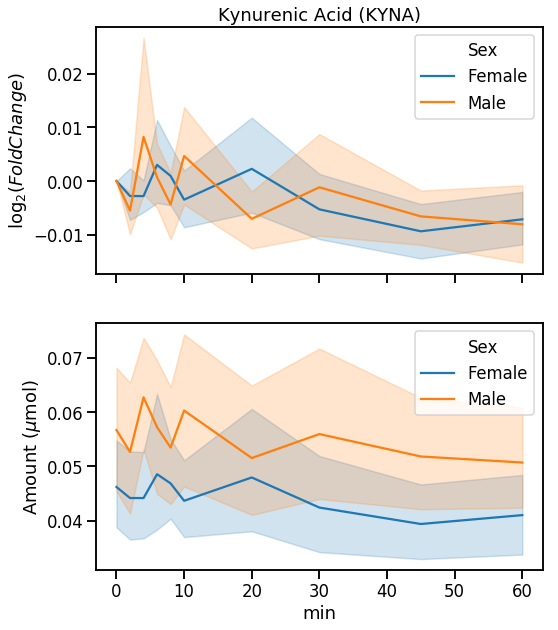

In [24]:
fig = pairplots('4-Hydroxy-2-quinolinecarboxylic acid',title='Kynurenic Acid (KYNA)')
fig.savefig('../viz/mvf_timeseries/kynurenic_acid.png',dpi=300)

/home/elijahc/.pyenv/versions/jupyterlab-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


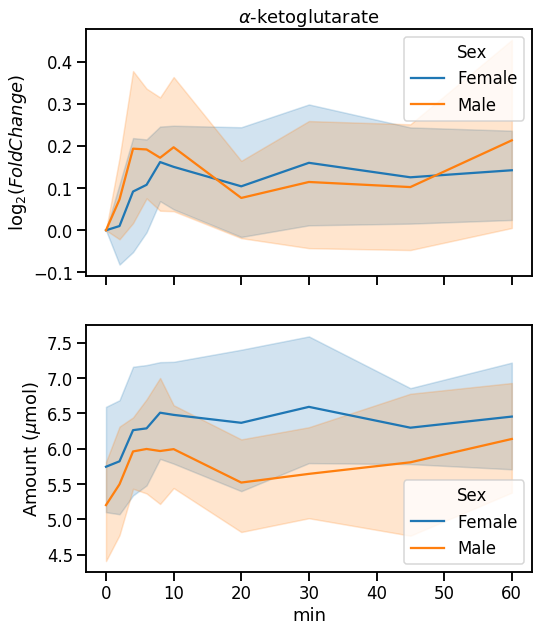

In [25]:
# Plot timeseries for alpha-ketoglutarate
fig = pairplots('2-Oxoglutarate',title=r'$\alpha$-ketoglutarate')
fig.savefig('../viz/mvf_timeseries/2-oxoglutarate.png',dpi=300)

/home/elijahc/.pyenv/versions/jupyterlab-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


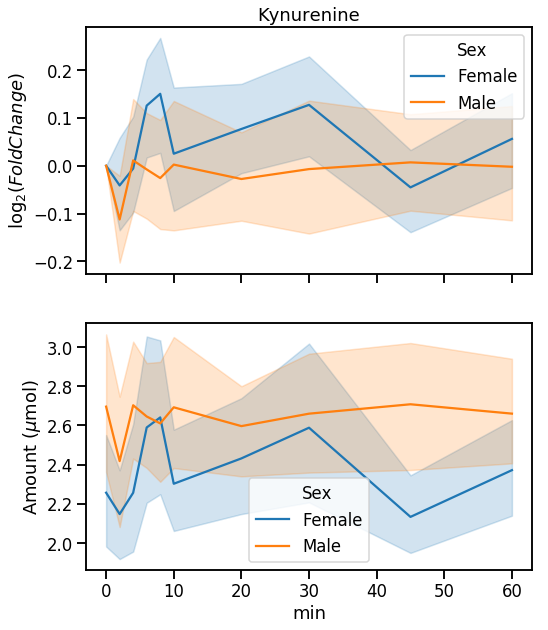

In [27]:
fig = pairplots('Kynurenine',title='Kynurenine')
fig.savefig('../viz/mvf_timeseries/kynurenine.png',dpi=300)

/home/elijahc/.pyenv/versions/jupyterlab-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


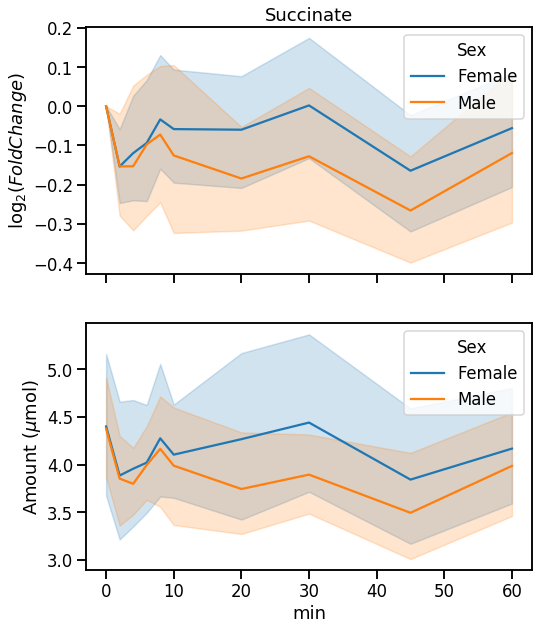

In [28]:
# metab = 'Succinate'
fig = pairplots('Succinate','Succinate')
fig.savefig('../viz/mvf_timeseries/succinate.png',dpi=300)

/home/elijahc/.pyenv/versions/jupyterlab-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


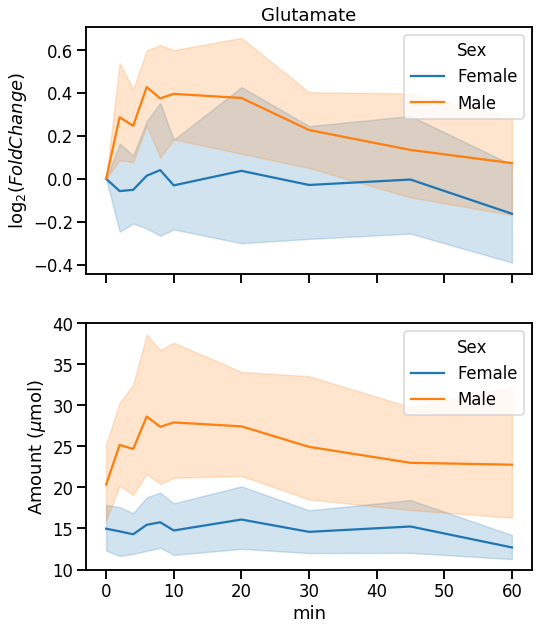

In [29]:
fig = pairplots('L-Glutamate','Glutamate')
fig.savefig('../viz/mvf_timeseries/glutamate.png',dpi=300)

/home/elijahc/.pyenv/versions/jupyterlab-gpu/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


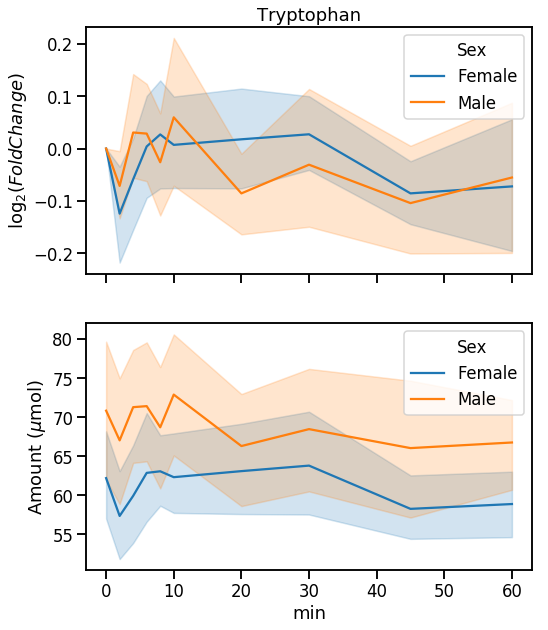

In [30]:
fig = pairplots('Tryptophan',title='Tryptophan')
fig.savefig('../viz/mvf_timeseries/tryptophan.png',dpi=300)